# Experimento 3: _GridSearch_ no SVM

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

## Busca em grade

In [2]:
fs20_df = pd.read_csv('./csvs/fs20.csv')
target_s = fs20_df.pop('target')

param_grid_1 = {'svc__C':[0.5, 1, 1.5, 2, 2.5],
        'svc__gamma':['scale', 'auto', 0.01, 0.1, 0.25, 0.5, 1, 1.5]}

results_1 = GridSearchCV(
    estimator=make_pipeline(StandardScaler(),
                            SVC(cache_size=500)),
    param_grid=param_grid_1,
    n_jobs=-1,
    cv=StratifiedKFold(n_splits=10,
                       shuffle=True)
    ).fit(
        X=fs20_df.values,
        y=target_s.values
        ).cv_results_

results_1_df = pd.DataFrame(results_1)
results_1_df.to_csv('./csvs/06-gs_svm-1.csv')
results_1_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.382353,0.045531,0.045532,0.016001,0.5,scale,"{'svc__C': 0.5, 'svc__gamma': 'scale'}",0.776923,0.826255,0.864865,0.841699,0.857143,0.849421,0.810811,0.837838,0.849421,0.814672,0.832905,0.025010,34
1,0.321374,0.029745,0.038491,0.002272,0.5,auto,"{'svc__C': 0.5, 'svc__gamma': 'auto'}",0.776923,0.826255,0.864865,0.841699,0.857143,0.849421,0.810811,0.837838,0.849421,0.814672,0.832905,0.025010,34
2,0.507142,0.056919,0.047234,0.014357,0.5,0.01,"{'svc__C': 0.5, 'svc__gamma': 0.01}",0.523077,0.528958,0.559846,0.555985,0.594595,0.579151,0.540541,0.563707,0.567568,0.544402,0.555783,0.021028,40
3,0.302047,0.023033,0.037462,0.003667,0.5,0.1,"{'svc__C': 0.5, 'svc__gamma': 0.1}",0.784615,0.857143,0.888031,0.876448,0.876448,0.888031,0.841699,0.868726,0.880309,0.861004,0.862245,0.029288,33
4,0.300988,0.056672,0.042876,0.016677,0.5,0.25,"{'svc__C': 0.5, 'svc__gamma': 0.25}",0.876923,0.903475,0.930502,0.942085,0.918919,0.926641,0.891892,0.907336,0.930502,0.915058,0.914333,0.018804,24
5,0.384278,0.092581,0.042474,0.022229,0.5,0.5,"{'svc__C': 0.5, 'svc__gamma': 0.5}",0.923077,0.953668,0.953668,0.965251,0.945946,0.938224,0.949807,0.953668,0.961390,0.934363,0.947906,0.012179,19
6,0.359574,0.017008,0.027188,0.001556,0.5,1,"{'svc__C': 0.5, 'svc__gamma': 1}",0.953846,0.980695,0.961390,0.976834,0.957529,0.961390,0.965251,0.980695,0.969112,0.957529,0.966427,0.009442,17
7,0.417205,0.025025,0.028386,0.001876,0.5,1.5,"{'svc__C': 0.5, 'svc__gamma': 1.5}",0.953846,0.984556,0.969112,0.972973,0.957529,0.949807,0.972973,0.984556,0.984556,0.957529,0.968744,0.012720,15
8,0.268660,0.009339,0.036109,0.002025,1,scale,"{'svc__C': 1, 'svc__gamma': 'scale'}",0.803846,0.872587,0.907336,0.880309,0.903475,0.903475,0.845560,0.880309,0.899614,0.884170,0.878068,0.030422,31
9,0.268400,0.017939,0.035199,0.003402,1,auto,"{'svc__C': 1, 'svc__gamma': 'auto'}",0.803846,0.872587,0.907336,0.880309,0.903475,0.903475,0.845560,0.880309,0.899614,0.884170,0.878068,0.030422,31


param_svc__C,param_svc__gamma,mean_test_score,std_test_score,rank_test_score
0.500000,scale,0.832905,0.025010,34
0.500000,auto,0.832905,0.025010,34
0.500000,0.010000,0.555783,0.021028,40
0.500000,0.100000,0.862245,0.029288,33
0.500000,0.250000,0.914333,0.018804,24
0.500000,0.500000,0.947906,0.012179,19
0.500000,1,0.966427,0.009442,17
0.500000,1.500000,0.968744,0.012720,15
1,scale,0.878068,0.030422,31
1,auto,0.878068,0.030422,31


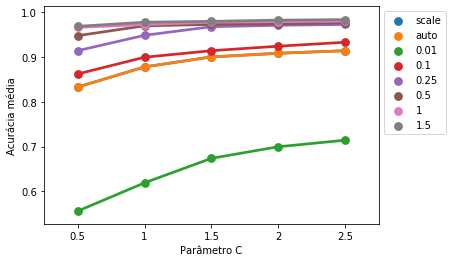

In [3]:
sns.pointplot(
    data=results_1_df,
    x='param_svc__C',
    y='mean_test_score',
    hue='param_svc__gamma',
    ).set(
        xlabel='Parâmetro C',
        ylabel='Acurácia média')

plt.legend(bbox_to_anchor=(1, 1))

results_1_df[[
    'param_svc__C',
    'param_svc__gamma',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
    ]].style.hide_index().background_gradient(cmap='Blues_r', subset=['rank_test_score'])

# Experimento 4: expandindo intervalo da busca em grade

In [4]:
param_grid_2 = {'svc__C':[1, 10, 100, 1000, 10_000, 100_000],
                'svc__gamma':np.arange(0.5, 5.5, 0.5)}

results_2 = GridSearchCV(
    estimator=make_pipeline(StandardScaler(),
                            SVC(cache_size=500)),
    param_grid=param_grid_2,
    n_jobs=-1,
    cv=StratifiedKFold(n_splits=10,
                       shuffle=True)
    ).fit(
        X=fs20_df.values,
        y=target_s.values
        ).cv_results_

results_2_df = pd.DataFrame(results_2)
results_2_df.to_csv('./csvs/06-gs_svm-2.csv')
results_2_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.365191,0.101213,0.025996,0.004086,1,0.5,"{'svc__C': 1, 'svc__gamma': 0.5}",0.980769,0.972973,0.980695,0.969112,0.961390,0.980695,0.957529,0.965251,0.965251,0.969112,0.970278,0.007932,60
1,0.388307,0.050691,0.027622,0.008955,1,1,"{'svc__C': 1, 'svc__gamma': 1.0}",0.980769,0.972973,0.984556,0.957529,0.969112,0.980695,0.957529,0.976834,0.984556,0.969112,0.973366,0.009534,59
2,0.459784,0.058603,0.023154,0.002566,1,1.5,"{'svc__C': 1, 'svc__gamma': 1.5}",0.984615,0.972973,0.980695,0.969112,0.984556,0.980695,0.961390,0.984556,0.984556,0.976834,0.977998,0.007542,58
3,0.539524,0.111937,0.028023,0.008180,1,2,"{'svc__C': 1, 'svc__gamma': 2.0}",0.984615,0.980695,0.984556,0.972973,0.980695,0.984556,0.965251,0.988417,0.984556,0.980695,0.980701,0.006464,55
4,0.605604,0.055261,0.027515,0.004684,1,2.5,"{'svc__C': 1, 'svc__gamma': 2.5}",0.984615,0.984556,0.984556,0.969112,0.980695,0.984556,0.965251,0.992278,0.988417,0.980695,0.981473,0.007877,52
5,0.675121,0.066064,0.027151,0.003633,1,3,"{'svc__C': 1, 'svc__gamma': 3.0}",0.984615,0.984556,0.984556,0.969112,0.980695,0.988417,0.965251,0.992278,0.988417,0.980695,0.981859,0.008110,51
6,0.725491,0.089192,0.030601,0.005350,1,3.5,"{'svc__C': 1, 'svc__gamma': 3.5}",0.984615,0.984556,0.980695,0.969112,0.980695,0.988417,0.961390,0.992278,0.984556,0.984556,0.981087,0.008713,54
7,0.818218,0.119725,0.030449,0.005860,1,4,"{'svc__C': 1, 'svc__gamma': 4.0}",0.980769,0.988417,0.976834,0.965251,0.980695,0.988417,0.961390,0.992278,0.988417,0.988417,0.981089,0.009986,53
8,0.876159,0.097614,0.036905,0.010352,1,4.5,"{'svc__C': 1, 'svc__gamma': 4.5}",0.980769,0.988417,0.980695,0.965251,0.980695,0.992278,0.961390,0.988417,0.984556,0.980695,0.980316,0.009371,56
9,0.947869,0.149137,0.032014,0.004663,1,5,"{'svc__C': 1, 'svc__gamma': 5.0}",0.980769,0.984556,0.980695,0.965251,0.980695,0.992278,0.961390,0.988417,0.980695,0.972973,0.978772,0.009179,57


param_svc__C,param_svc__gamma,mean_test_score,std_test_score,rank_test_score
1,0.500000,0.970278,0.007932,60
1,1.000000,0.973366,0.009534,59
1,1.500000,0.977998,0.007542,58
1,2.000000,0.980701,0.006464,55
1,2.500000,0.981473,0.007877,52
1,3.000000,0.981859,0.008110,51
1,3.500000,0.981087,0.008713,54
1,4.000000,0.981089,0.009986,53
1,4.500000,0.980316,0.009371,56
1,5.000000,0.978772,0.009179,57


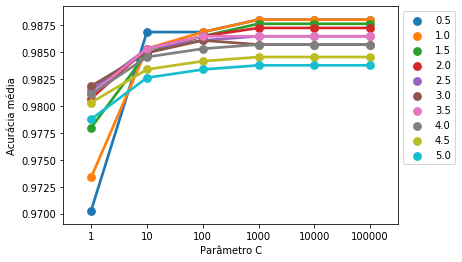

In [5]:
sns.pointplot(
    data=results_2_df,
    x='param_svc__C',
    y='mean_test_score',
    hue='param_svc__gamma',
    ).set(
        xlabel='Parâmetro C',
        ylabel='Acurácia média')

plt.legend(bbox_to_anchor=(1, 1))

results_2_df[[
    'param_svc__C',
    'param_svc__gamma',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
    ]].style.hide_index().background_gradient(cmap='Blues_r', subset=['rank_test_score'])

# Experimento 5: Restringindo intervalos

No experimento 4, nota-se que os melhores desempenhos ocorrem com `gamma` entre 0.5 e 1, e também com `C` em um valor acima de 1000.

In [6]:
param_grid_3 = {'svc__gamma':np.around(np.arange(0.5, 1.05, 0.05), 3)}

results_3 = GridSearchCV(
    estimator=make_pipeline(StandardScaler(),
                            SVC(C=10_000, cache_size=500)),
    param_grid=param_grid_3,
    n_jobs=-1,
    cv=StratifiedKFold(n_splits=10,
                       shuffle=True)
    ).fit(
        X=fs20_df.values,
        y=target_s.values
        ).cv_results_

results_3_df = pd.DataFrame(results_3)
results_3_df.to_csv('./csvs/06-gs_svm-3.csv')
results_3_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.336213,0.065309,0.018587,0.003568,0.5,{'svc__gamma': 0.5},0.992308,0.976834,0.969112,0.992278,0.988417,0.984556,0.980695,1.000000,0.988417,0.992278,0.986489,0.008505,5
1,0.302051,0.049723,0.021219,0.007176,0.55,{'svc__gamma': 0.55},0.992308,0.976834,0.972973,0.988417,0.988417,0.984556,0.984556,1.000000,0.988417,0.992278,0.986876,0.007369,1
2,0.291913,0.035407,0.020564,0.005030,0.6,{'svc__gamma': 0.6},0.992308,0.976834,0.972973,0.988417,0.988417,0.984556,0.984556,1.000000,0.988417,0.992278,0.986876,0.007369,1
3,0.307698,0.055285,0.019443,0.003990,0.65,{'svc__gamma': 0.65},0.992308,0.976834,0.972973,0.988417,0.984556,0.984556,0.984556,0.996139,0.988417,0.992278,0.986103,0.006735,8
4,0.300547,0.052405,0.020619,0.005094,0.7,{'svc__gamma': 0.7},0.992308,0.976834,0.972973,0.988417,0.984556,0.984556,0.984556,0.996139,0.988417,0.992278,0.986103,0.006735,8
5,0.330617,0.058422,0.020312,0.003855,0.75,{'svc__gamma': 0.75},0.992308,0.980695,0.972973,0.988417,0.984556,0.984556,0.988417,0.996139,0.988417,0.992278,0.986876,0.006276,1
6,0.328226,0.041609,0.019143,0.003241,0.8,{'svc__gamma': 0.8},0.992308,0.980695,0.972973,0.980695,0.984556,0.984556,0.988417,0.996139,0.988417,0.996139,0.986489,0.006963,6
7,0.360786,0.065288,0.021165,0.003709,0.85,{'svc__gamma': 0.85},0.992308,0.980695,0.972973,0.980695,0.984556,0.984556,0.988417,0.996139,0.988417,0.996139,0.986489,0.006963,6
8,0.366051,0.046227,0.020727,0.003023,0.9,{'svc__gamma': 0.9},0.992308,0.980695,0.976834,0.980695,0.984556,0.984556,0.988417,0.996139,0.988417,0.996139,0.986876,0.006276,1
9,0.369049,0.056934,0.020687,0.003791,0.95,{'svc__gamma': 0.95},0.988462,0.976834,0.976834,0.980695,0.984556,0.984556,0.988417,0.996139,0.988417,0.992278,0.985719,0.005996,10


No handles with labels found to put in legend.


param_svc__gamma,mean_test_score,std_test_score,rank_test_score
0.500000,0.986489,0.008505,5
0.550000,0.986876,0.007369,1
0.600000,0.986876,0.007369,1
0.650000,0.986103,0.006735,8
0.700000,0.986103,0.006735,8
0.750000,0.986876,0.006276,1
0.800000,0.986489,0.006963,6
0.850000,0.986489,0.006963,6
0.900000,0.986876,0.006276,1
0.950000,0.985719,0.005996,10


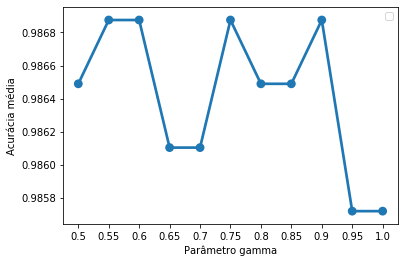

In [7]:
sns.pointplot(
    data=results_3_df,
    x='param_svc__gamma',
    y='mean_test_score'
    ).set(
        xlabel='Parâmetro gamma',   
        ylabel='Acurácia média')  

results_3_df[[
    'param_svc__gamma',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
    ]].style.hide_index().background_gradient(cmap='Blues_r', subset=['rank_test_score'])

In [11]:
results_4 = GridSearchCV(
    estimator=make_pipeline(StandardScaler(),
                            SVC(C=10_000, cache_size=500)),
    param_grid=param_grid_3,
    n_jobs=-1,
    cv=StratifiedKFold(n_splits=10,
                       shuffle=True)
    ).fit(
        X=fs20_df.values,
        y=target_s.values
        ).cv_results_

results_4_df = pd.DataFrame(results_4)
results_4_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.249211,0.033892,0.015779,0.001738,0.5,{'svc__gamma': 0.5},0.992308,0.992278,0.988417,0.984556,0.992278,0.992278,0.988417,0.980695,1.000000,0.992278,0.990350,0.004961,1
1,0.284133,0.065659,0.019255,0.004486,0.55,{'svc__gamma': 0.55},0.992308,0.992278,0.988417,0.984556,0.992278,0.992278,0.988417,0.976834,1.000000,0.992278,0.989964,0.005780,2
2,0.371720,0.083897,0.024109,0.005249,0.6,{'svc__gamma': 0.6},0.992308,0.984556,0.988417,0.984556,0.992278,0.992278,0.988417,0.976834,1.000000,0.992278,0.989192,0.005933,3
3,0.333435,0.064635,0.022737,0.009640,0.65,{'svc__gamma': 0.65},0.988462,0.980695,0.988417,0.984556,0.992278,0.992278,0.988417,0.976834,1.000000,0.992278,0.988421,0.006226,4
4,0.310069,0.062426,0.020661,0.004588,0.7,{'svc__gamma': 0.7},0.988462,0.980695,0.988417,0.984556,0.992278,0.992278,0.988417,0.976834,1.000000,0.992278,0.988421,0.006226,4
5,0.359087,0.088349,0.024222,0.011378,0.75,{'svc__gamma': 0.75},0.988462,0.976834,0.988417,0.980695,0.992278,0.992278,0.992278,0.976834,1.000000,0.992278,0.988035,0.007213,7
6,0.359716,0.093018,0.017605,0.001875,0.8,{'svc__gamma': 0.8},0.988462,0.976834,0.988417,0.984556,0.988417,0.992278,0.992278,0.976834,1.000000,0.992278,0.988035,0.006787,6
7,0.310908,0.024856,0.019607,0.002484,0.85,{'svc__gamma': 0.85},0.984615,0.976834,0.992278,0.980695,0.988417,0.992278,0.992278,0.976834,0.996139,0.996139,0.987651,0.007075,8
8,0.399456,0.073944,0.024478,0.005617,0.9,{'svc__gamma': 0.9},0.984615,0.976834,0.992278,0.980695,0.988417,0.992278,0.992278,0.976834,0.996139,0.996139,0.987651,0.007075,8
9,0.400191,0.076700,0.021045,0.004121,0.95,{'svc__gamma': 0.95},0.984615,0.972973,0.988417,0.980695,0.988417,0.992278,0.992278,0.976834,0.996139,0.996139,0.986879,0.007564,10


param_svc__gamma,mean_test_score,std_test_score,rank_test_score
0.500000,0.990350,0.004961,1
0.550000,0.989964,0.005780,2
0.600000,0.989192,0.005933,3
0.650000,0.988421,0.006226,4
0.700000,0.988421,0.006226,4
0.750000,0.988035,0.007213,7
0.800000,0.988035,0.006787,6
0.850000,0.987651,0.007075,8
0.900000,0.987651,0.007075,8
0.950000,0.986879,0.007564,10


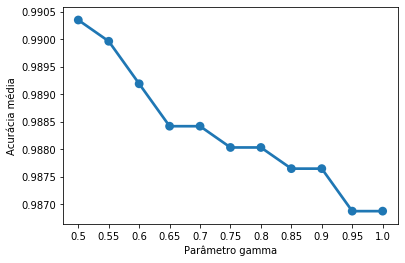

In [12]:
sns.pointplot(
    data=results_4_df,
    x='param_svc__gamma',
    y='mean_test_score',
    ).set(
        xlabel='Parâmetro gamma',
        ylabel='Acurácia média')

results_4_df[[
    'param_svc__gamma',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
    ]].style.hide_index().background_gradient(cmap='Blues_r', subset=['rank_test_score'])